In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

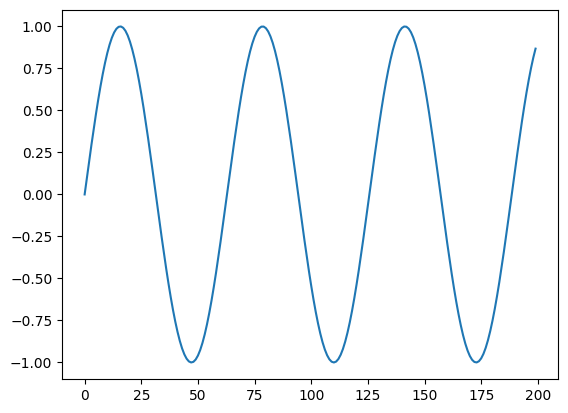

In [3]:
#make the original data
series =np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1

#plot it
plt.plot(series)
plt.show()

In [9]:
###build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1,T,1) #Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape" , X.shape, "Y.shape" , Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [23]:
### try autoregressive RNN model
i = Input(shape=(T,1))
x = SimpleRNN(5)(i)
x = Dense(1)(x)
model = Model(i,x)

model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

#train the RNN
r = model.fit(X[:-N//2],Y[:-N//2], epochs=80,
              validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - loss: 0.4193 - val_loss: 0.0731
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0508 - val_loss: 0.0713
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0529 - val_loss: 0.0269
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0169 - val_loss: 0.0224
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0193 - val_loss: 0.0250
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0157 - val_loss: 0.0106
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0125 - val_loss: 0.0150
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0136 - val_loss: 0.0147
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0077 - val_loss: 0.0088
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0052 - val_loss: 0.0097


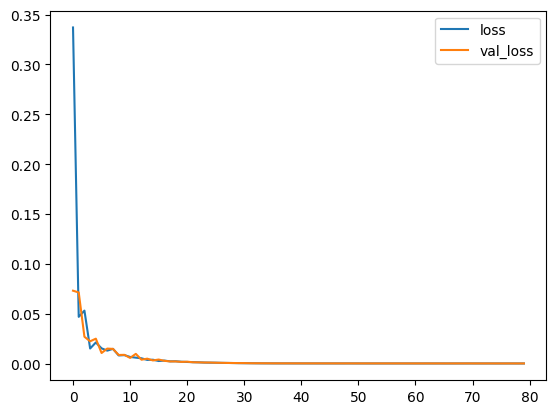

In [24]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [26]:
# "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0] #1x1 array -> scalar
    i += 1

    #update the predictions left
    validation_predictions.append(p)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

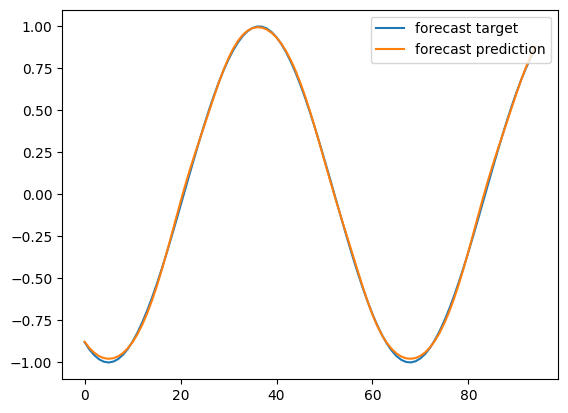

In [27]:

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [28]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2:] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1,1)) [0,0] #1x1 array -> scalar

    #update the predictions list
    validation_predictions.append(p)

    #make the new input
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━

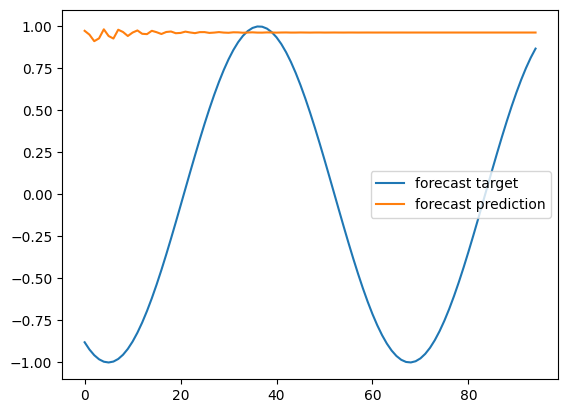

In [29]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [21]:
### try autoregressive RNN model
i = Input(shape=(T,1))
x = SimpleRNN(5,activation=None)(i)
x = Dense(1)(x)
model = Model(i,x)

model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

#train the RNN
r = model.fit(X[:-N//2],Y[:-N//2], epochs=80,
              validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 3.4665 - val_loss: 0.3850
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3831 - val_loss: 0.2672
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2565 - val_loss: 0.1842
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1917 - val_loss: 0.1644
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1406 - val_loss: 0.0914
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0873 - val_loss: 0.0816
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0508 - val_loss: 0.0343
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0177 - val_loss: 4.7885e-04
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0015 - val_loss: 0.0148
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0135 - val_loss: 0.0259
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0197 - val_loss: 0.0119
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0106 - val_loss: 0.0

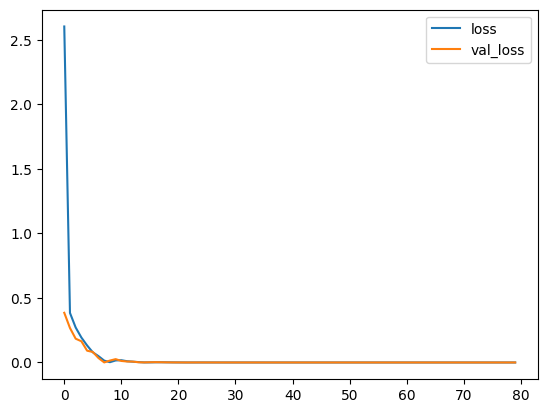

In [22]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [30]:
# "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0] #1x1 array -> scalar
    i += 1

    #update the predictions left
    validation_predictions.append(p)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

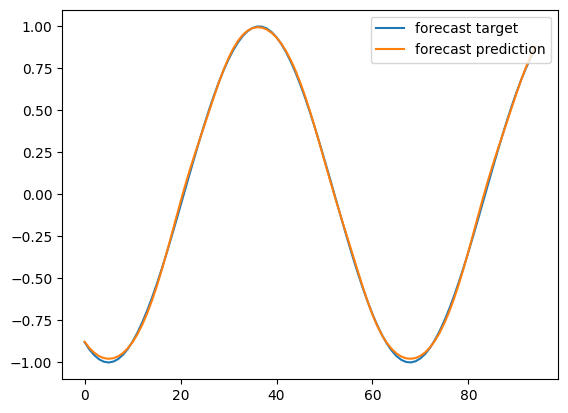

In [31]:

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [34]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2:] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1,1))[0,0] #1x1 array -> scalar

    #update the predictions list
    validation_predictions.append(p)

    #make the new input
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━

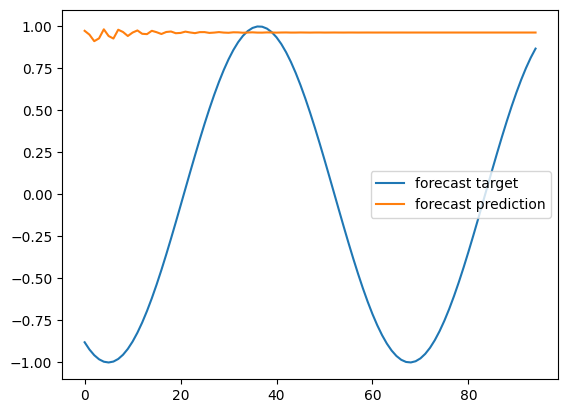

In [35]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

---------


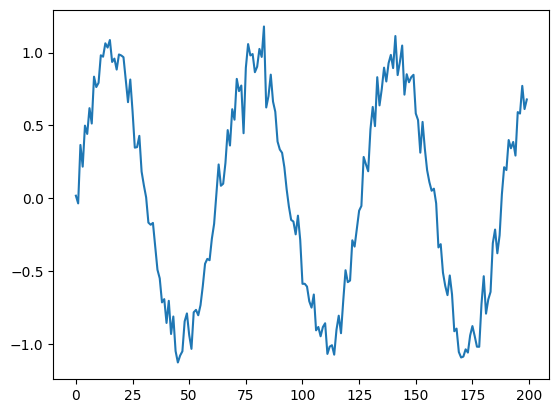

In [36]:
#make the original data
series =np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

#plot it
plt.plot(series)
plt.show()

In [37]:
###build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1,T,1) #Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape" , X.shape, "Y.shape" , Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [40]:
### try autoregressive RNN model
i = Input(shape=(T,1))
x = SimpleRNN(5,activation=None)(i)
x = Dense(1)(x)
model = Model(i,x)

model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

#train the RNN
r = model.fit(X[:-N//2],Y[:-N//2], epochs=80,
              validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.9837 - val_loss: 0.1081
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0994 - val_loss: 0.1209
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1226 - val_loss: 0.2164
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1959 - val_loss: 0.0632
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0561 - val_loss: 0.0335
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0330 - val_loss: 0.0466
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0425 - val_loss: 0.0329
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0334 - val_loss: 0.0288
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0295 - val_loss: 0.0297
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0239 - val_loss: 0.0243
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0239 - val_loss: 0.0263
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0237 - val_loss: 0.0275


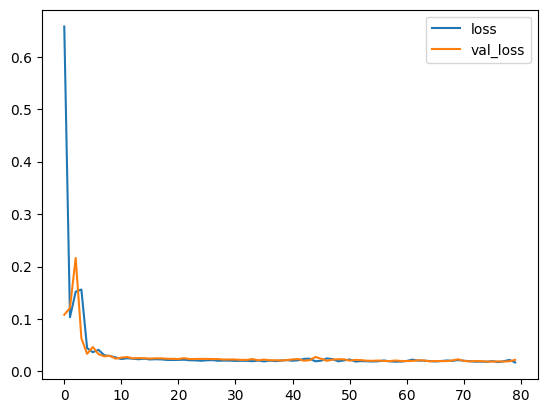

In [41]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [42]:
# "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0] #1x1 array -> scalar
    i += 1

    #update the predictions left
    validation_predictions.append(p)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━

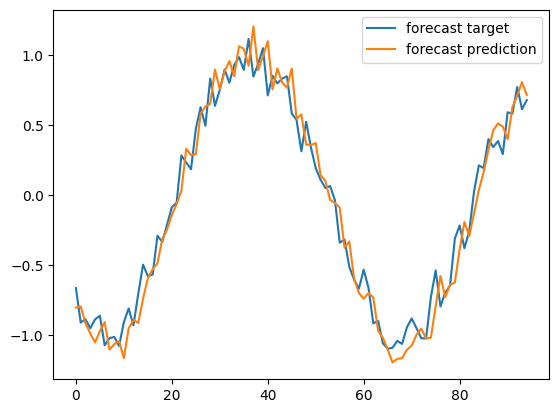

In [43]:

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [44]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2:] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1,1))[0,0] #1x1 array -> scalar

    #update the predictions list
    validation_predictions.append(p)

    #make the new input
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━

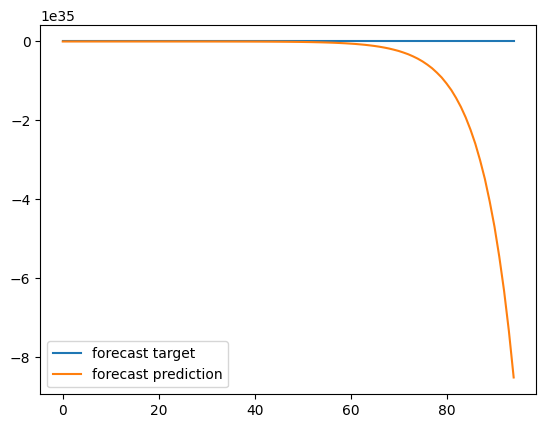

In [46]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

-------

In [47]:
### try autoregressive RNN model
i = Input(shape=(T,1))
x = SimpleRNN(5)(i)
x = Dense(1)(x)
model = Model(i,x)

model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

#train the RNN
r = model.fit(X[:-N//2],Y[:-N//2], epochs=80,
              validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.3727 - val_loss: 0.1201
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1006 - val_loss: 0.0411
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0451 - val_loss: 0.0397
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0415 - val_loss: 0.0530
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0407 - val_loss: 0.0312
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0332 - val_loss: 0.0371
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0354 - val_loss: 0.0308
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0304 - val_loss: 0.0296
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0293 - val_loss: 0.0338
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0252 - val_loss: 0.0364
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0280 - val_loss: 0.0320
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0277 - val_loss: 0.0293


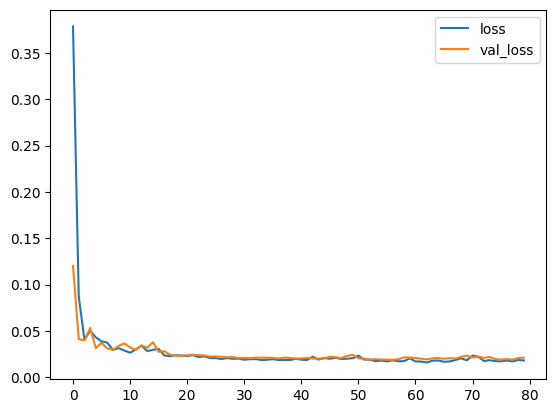

In [48]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [49]:
# "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0] #1x1 array -> scalar
    i += 1

    #update the predictions left
    validation_predictions.append(p)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

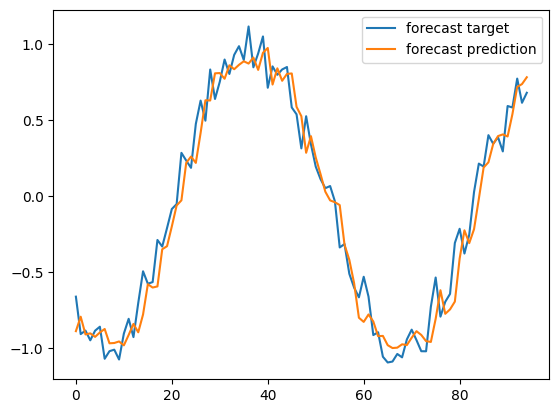

In [50]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [54]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2:] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1,1))[0,0] #1x1 array -> scalar

    #update the predictions list
    validation_predictions.append(p)

    #make the new input
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━

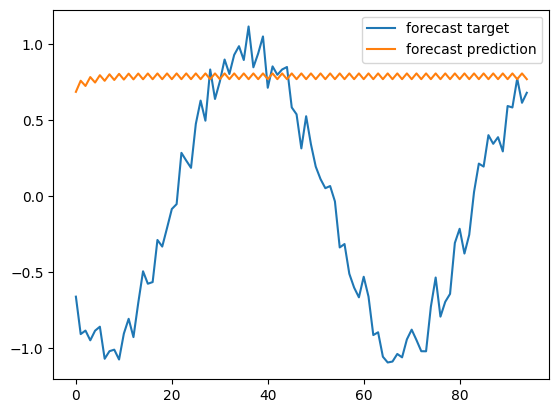

In [55]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

---

In [57]:
T = 10
### try autoregressive RNN model
i = Input(shape=(T,1))
x = SimpleRNN(5,activation='relu')(i)
x = Dense(1)(x)
model = Model(i,x)

model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

#train the RNN
r = model.fit(X[:-N//2],Y[:-N//2], epochs=80,
              validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - loss: 1.2488 - val_loss: 0.5747
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4812 - val_loss: 0.2426
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2602 - val_loss: 0.2269
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1673 - val_loss: 0.1098
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1783 - val_loss: 0.1253
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1535 - val_loss: 0.0677
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1042 - val_loss: 0.1047
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0949 - val_loss: 0.0537
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0592 - val_loss: 0.0390
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0590 - val_loss: 0.0324
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0457 - val_loss: 0.0343
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0320 - val_loss: 0.0283


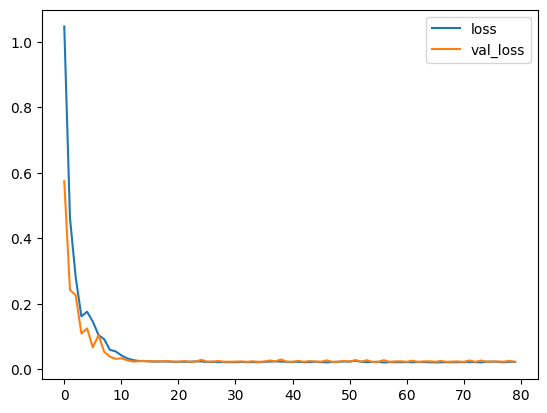

In [58]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [59]:
# "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0] #1x1 array -> scalar
    i += 1

    #update the predictions left
    validation_predictions.append(p)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━

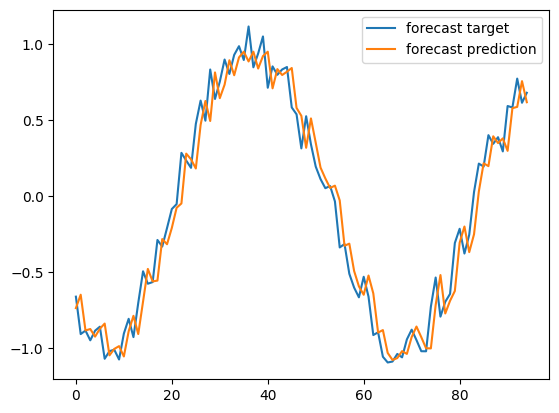

In [60]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [61]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2:] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1,1))[0,0] #1x1 array -> scalar

    #update the predictions list
    validation_predictions.append(p)

    #make the new input
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━

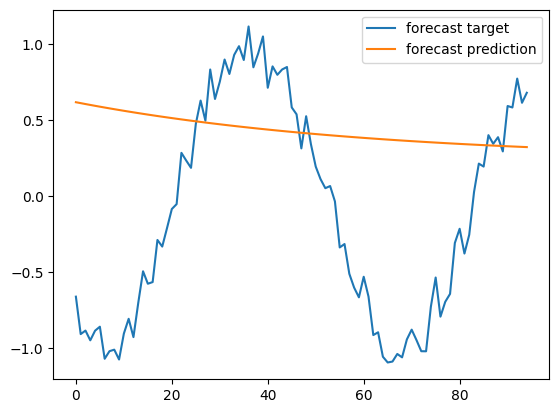

In [62]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()